# Ratings Prediction using NLP

The notebook proposes NLP for analysis of the data extracted and ML and DL approches for predictions. 
Analysis include frequetly occuring words and sentiment analysis algorithms tested in ML are -:

1. Decision tree classifier
2. Random forest classifier
3. swicthed vector classification

Further a Deep Learning model is trained for 2 epoch with a batch size of 32.

## Necessary libraries imported

In [243]:
#importing necesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from collections import Counter
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import warnings 
from wordcloud import WordCloud
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

## Importing CSV files

In [221]:
#importing reviews scraped from amazon
amazon_reviews=pd.read_csv('Amazon-Reviews.csv')

In [222]:
amazon_reviews.head()

,Unnamed: 0,star,reviews
0,0,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Good performance i...
1,1,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Nice\n \nRead more
2,2,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n System is ok but b...
3,3,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Nice look\n \nRea...
4,4,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Good\n \nRead more


In [223]:
#importing flipkart reviews
flipkartReviews=pd.read_csv('Flipkart-Reviews.csv')

In [224]:
flipkartReviews.head()

,Unnamed: 0,star,reviews
0,0,5,Hp laptop is the Best one 👍💞😍\nI am so Happy f...
1,1,5,Just awesome laptop... Everything is just perf...
2,2,5,Great laptop\nmust buy\nPerfect for multimedia...
3,3,4,Design looks very good\nPerformance is ok it's...
4,4,5,Excellent performance. I got it within 34 k on...


## Clean the data

### for amazon, clean whitespaces and slice unnecessary columns and data  

In [225]:
amazon_reviews.head()

,Unnamed: 0,star,reviews
0,0,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Good performance i...
1,1,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Nice\n \nRead more
2,2,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n System is ok but b...
3,3,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Nice look\n \nRea...
4,4,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Good\n \nRead more


In [226]:
#cleaning whitespaces, slicing columns to keep only necessary data from star series
amazon_reviews = amazon_reviews.replace('\n','', regex=True)
amazon_reviews['star']=amazon_reviews['star'].str.slice(0,1)
amazon_reviews.drop('Unnamed: 0',axis=1,inplace=True)

In [227]:
amazon_reviews.head()

,star,reviews
0,4,Good performance in this range. Read ...
1,4,Nice Read more
2,4,System is ok but battery back up is le...
3,4,Nice look Read more
4,4,Good Read more


### for flipkart, clean whitespaces and slice unnecessary columns

In [228]:
flipkartReviews.head()

,Unnamed: 0,star,reviews
0,0,5,Hp laptop is the Best one 👍💞😍\nI am so Happy f...
1,1,5,Just awesome laptop... Everything is just perf...
2,2,5,Great laptop\nmust buy\nPerfect for multimedia...
3,3,4,Design looks very good\nPerformance is ok it's...
4,4,5,Excellent performance. I got it within 34 k on...


In [229]:
#cleaning whitespace and slicing columns
flipkartReviews = flipkartReviews.replace('\n',' ', regex=True)
flipkartReviews.drop('Unnamed: 0',axis=1,inplace=True)

In [230]:
flipkartReviews.head()

,star,reviews
0,5,Hp laptop is the Best one 👍💞😍 I am so Happy fo...
1,5,Just awesome laptop... Everything is just perf...
2,5,Great laptop must buy Perfect for multimedia a...
3,4,Design looks very good Performance is ok it's ...
4,5,Excellent performance. I got it within 34 k on...


### join both amazon and flipkart dataFrames to create a single dataFrame

In [231]:
ds_train=pd.concat([amazon_reviews,flipkartReviews])

In [242]:
%store ds_train

Stored 'ds_train' (DataFrame)


In [233]:
ds_train.head()

,star,reviews
0,4,Good performance in this range. Read ...
1,4,Nice Read more
2,4,System is ok but battery back up is le...
3,4,Nice look Read more
4,4,Good Read more


### convert star series from object to int

In [234]:
ds_train.dtypes

star       object
reviews    object
dtype: object

In [235]:
ds_train['star']=(ds_train['star']).astype(int)

In [236]:
ds_train.dtypes

star        int32
reviews    object
dtype: object

In [237]:
ds_train.shape

(4202, 2)

### clean unnecessary characters from reviews series

In [238]:
#function written to clean data of punctuation marks and unnecessary characters.
#stopwords cleaning cannot be done as most of the bad reviews contain words like not, dont, etc. If they get cleared then it will affect the model.

def cleaning(data):
    #change comments to lower case
    data['reviews']=data['reviews'].str.lower()
    #remove punctuation in string using regex
    data['reviews']=data['reviews'].str.replace(r'[^\w\d\s]',' ')
    #replace whitespace
    data['reviews']=data['reviews'].str.replace(r'\s+',' ')
    #remove leading and trailing whitespace
    data['reviews']=data['reviews'].str.replace(r'^\s+|\s+?$',' ')

In [239]:
cleaning(ds_train)

In [240]:
ds_train

,star,reviews
0,4,good performance in this range read more
1,4,nice read more
2,4,system is ok but battery back up is less than...
3,4,nice look read more
4,4,good read more
...,...,...
1381,4,worth
1382,4,good
1383,4,nice laptop
1384,5,glad to shop must buy


In [241]:
ds_train.reset_index(drop=True, inplace=True)

### create vectors from words

In [175]:
tf_vec=TfidfVectorizer()

In [176]:
features=tf_vec.fit_transform(ds_train['reviews'])

In [177]:
features.shape

(4202, 4444)

## Split data into train set and test set

In [178]:
x=features
y=ds_train['star']

In [179]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

## Create model and Evaluate

### Decision Tree Classifier

In [180]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,y_pred_dtc))

0.8886774500475737


In [181]:
print(classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           1       0.72      0.78      0.75        27
           2       0.67      0.36      0.47        11
           3       0.95      0.91      0.93        81
           4       0.91      0.92      0.91       573
           5       0.86      0.86      0.86       359

    accuracy                           0.89      1051
   macro avg       0.82      0.77      0.79      1051
weighted avg       0.89      0.89      0.89      1051



In [182]:
print(confusion_matrix(y_test,y_pred_dtc))

[[ 21   0   3   1   2]
 [  3   4   0   3   1]
 [  2   1  74   2   2]
 [  2   0   1 526  44]
 [  1   1   0  48 309]]


Text(0.5, 0.98, 'Comparision of DTC results')

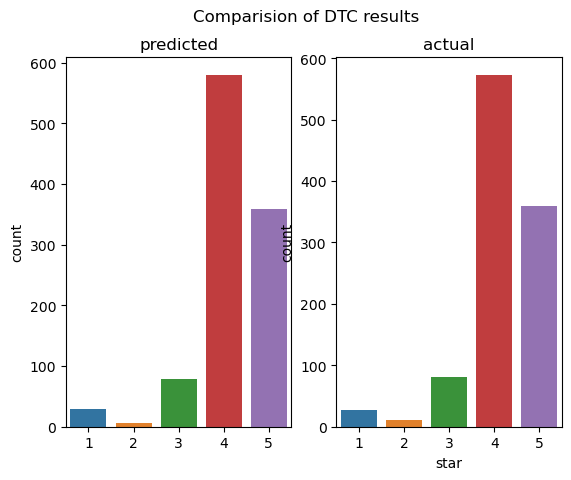

In [183]:
plt.subplot(1, 2, 1)
sns.countplot(y_pred_dtc)
plt.title('predicted')
plt.subplot(1, 2, 2)
sns.countplot(y_test)
plt.title('actual')
plt.suptitle('Comparision of DTC results')

### Random Forest Classifier

In [184]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,y_pred_rfc))

0.9067554709800191


In [185]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           1       0.94      0.63      0.76        27
           2       1.00      0.36      0.53        11
           3       1.00      0.91      0.95        81
           4       0.98      0.89      0.93       573
           5       0.80      0.97      0.88       359

    accuracy                           0.91      1051
   macro avg       0.95      0.75      0.81      1051
weighted avg       0.92      0.91      0.91      1051



In [186]:
print(confusion_matrix(y_test,y_pred_rfc))

[[ 17   0   0   0  10]
 [  1   4   0   1   5]
 [  0   0  74   0   7]
 [  0   0   0 509  64]
 [  0   0   0  10 349]]


Text(0.5, 0.98, 'Comparision of DTC results')

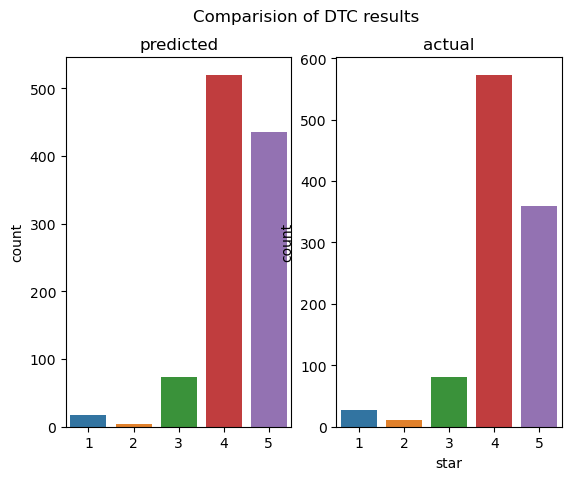

In [187]:
plt.subplot(1, 2, 1)
sns.countplot(y_pred_rfc)
plt.title('predicted')
plt.subplot(1, 2, 2)
sns.countplot(y_test)
plt.title('actual')
plt.suptitle('Comparision of DTC results')

### Support Vector Classifier

In [188]:
svc=svm.SVC()
svc.fit(x_train,y_train)
y_pred_svc=svc.predict(x_test)
print(accuracy_score(y_test,y_pred_svc))

0.9067554709800191


In [189]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           1       0.83      0.56      0.67        27
           2       1.00      0.36      0.53        11
           3       0.99      0.90      0.94        81
           4       0.98      0.90      0.94       573
           5       0.81      0.97      0.88       359

    accuracy                           0.91      1051
   macro avg       0.92      0.74      0.79      1051
weighted avg       0.92      0.91      0.91      1051



In [190]:
print(confusion_matrix(y_test,y_pred_svc))

[[ 15   0   0   0  12]
 [  2   4   0   0   5]
 [  1   0  73   1   6]
 [  0   0   0 513  60]
 [  0   0   1  10 348]]


Text(0.5, 0.98, 'Comparision of SVC results')

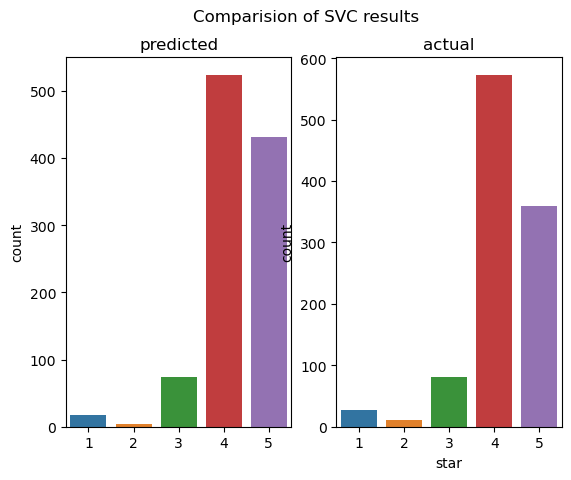

In [191]:
plt.subplot(1, 2, 1)
sns.countplot(y_pred_svc)
plt.title('predicted')
plt.subplot(1, 2, 2)
sns.countplot(y_test)
plt.title('actual')

plt.suptitle('Comparision of SVC results')

## Observations from the scores of above models

1. Random Forest Classifier performs best on the reviews data
2. Random Forest Classifier and Support Vector Classifier have better abilities to predict less abundant values.
3. Considering higher accuracy and minor differences in prediction capabilities Random Forest Classifier can be finalized.
4. Hyper parameter tuning does not result into good results considering text data.